In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Se Carga el archivo XLSX en un DataFrame
df = pd.read_excel(r'C:\Users\Alvaro\OneDrive\Documentos\Primer proyecto\codigo\Rinconcito_del_sabor\Datos-RS.xlsx')


In [5]:
df

,Operacion,Fecha,Tipo,Concepto,Entrada,Salida,DiaSemanaNum,DiaSemana
0,GASTOS,2022-04-25,Gastos de desechables,"desechables, bosas y azucar, 25/04/2022",0,10500.0,0,Lunes
1,GASTOS,2022-04-25,Gastos de bebidas,"cocacola, fuze, quatro coca-cola 25/04/2022",0,53600.0,0,Lunes
2,GASTOS,2022-04-25,Gastos de mecato,"proves, deditos y morenitas 25/04/2022",0,17007.0,0,Lunes
3,GASTOS,2022-04-25,insumos,"ara huevos y arroz, 25/04/2022",0,17010.0,0,Lunes
4,GASTOS,2022-04-25,insumos,"d1 pechugas, 25/04/2022",0,14650.0,0,Lunes
...,...,...,...,...,...,...,...,...
2988,GASTOS,2022-07-30,insumos,"ara, 30/07/2022",0,19150.0,5,Sábado
2989,GASTOS,2022-07-30,insumos,"masa, 30/07/2022",0,14000.0,5,Sábado
2990,GASTOS,2022-07-30,nomina,"fanny, 30/07/2022",0,20000.0,5,Sábado
2991,GASTOS,2022-07-30,nomina,"felipe, 30/07/2022",0,10000.0,5,Sábado


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Operacion     2993 non-null   object        
 1   Fecha         2993 non-null   datetime64[ns]
 2   Tipo          2993 non-null   object        
 3   Concepto      2993 non-null   object        
 4   Entrada       2993 non-null   int64         
 5   Salida        2993 non-null   float64       
 6   DiaSemanaNum  2993 non-null   int64         
 7   DiaSemana     2993 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 187.2+ KB


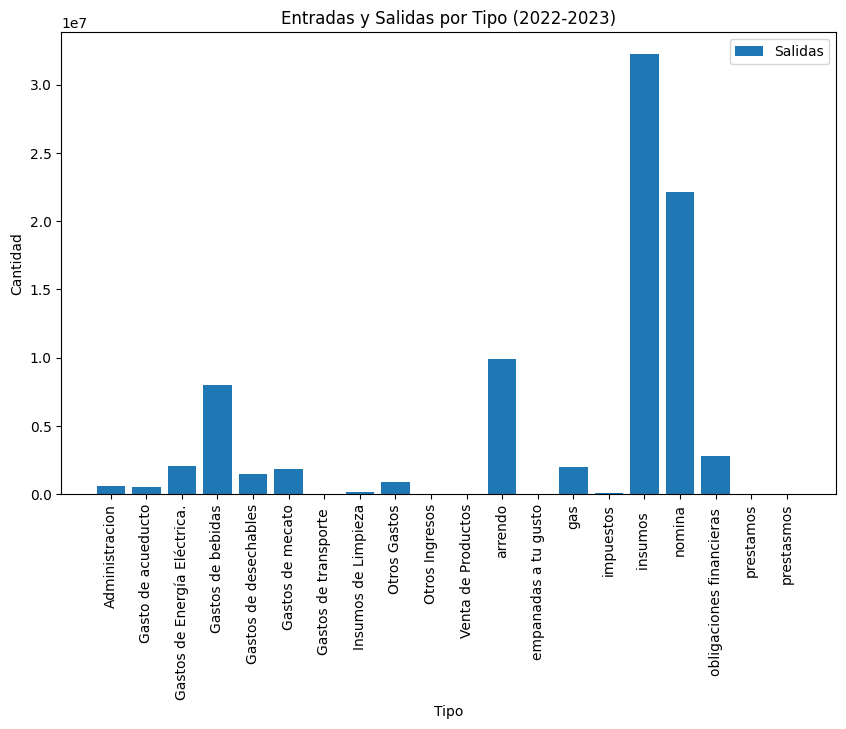

In [16]:
import matplotlib.pyplot as plt

# Extrae el año de la columna de fecha
df['año'] = df['Fecha'].dt.year

# Agrupa los datos por tipo y año, sumando las entradas y salidas
data_grouped = df.groupby(['Tipo', 'año'])[['Salida']].sum().reset_index()

# Crea un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(data_grouped['Tipo'], data_grouped['Salida'], label='Salidas')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Entradas y Salidas por Tipo (2022-2023)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [19]:
# Extrae el año de la columna de fecha
df['año'] = df['Fecha'].dt.year

# Filtra el DataFrame para incluir solo las salidas
salidas_df = df[df['Tipo'] == 'Salida']

# Agrupa los datos por tipo y año, sumando las salidas
data_grouped = salidas_df.groupby(['Tipo', 'año'])['Salida'].sum().unstack().reset_index()

# Crea un gráfico de barras agrupado por tipo
ax = data_grouped.plot(kind='bar', x='Tipo', stacked=True, figsize=(10, 6))
ax.set_xlabel('Tipo')
ax.set_ylabel('Salida')
ax.set_title('Salidas por Tipo y Año (2022-2023)')
ax.legend(title='Año', labels=['2022', '2023'])
plt.xticks(rotation=45)
plt.show()



TypeError: no numeric data to plot

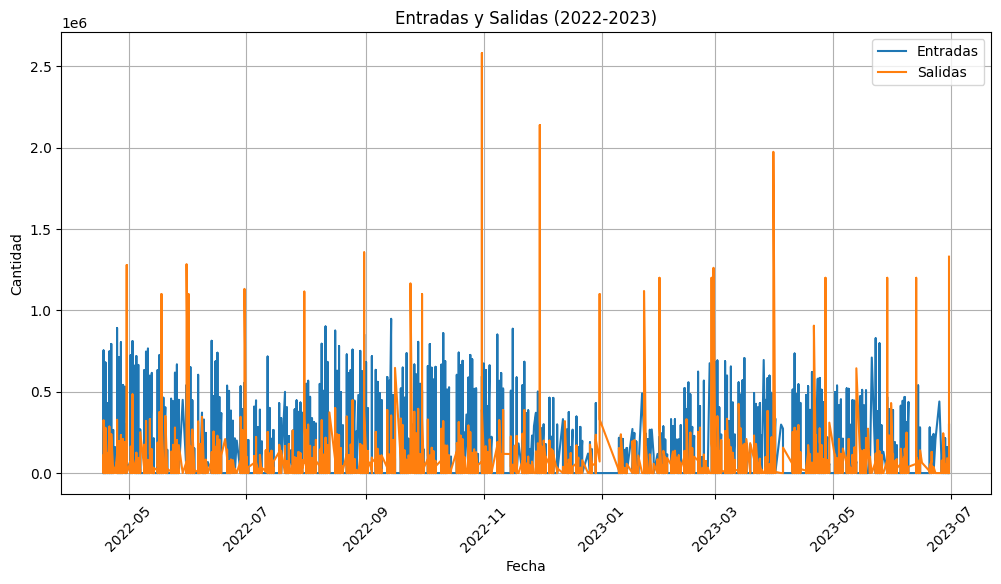

In [21]:
# Agrupa los datos por fecha y tipo, sumando las entradas y salidas
data_grouped = df.groupby(['Fecha', 'Tipo'])[['Entrada', 'Salida']].sum().reset_index()

# Crea un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(data_grouped['Fecha'], data_grouped['Entrada'], label='Entradas')
plt.plot(data_grouped['Fecha'], data_grouped['Salida'], label='Salidas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Entradas y Salidas (2022-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


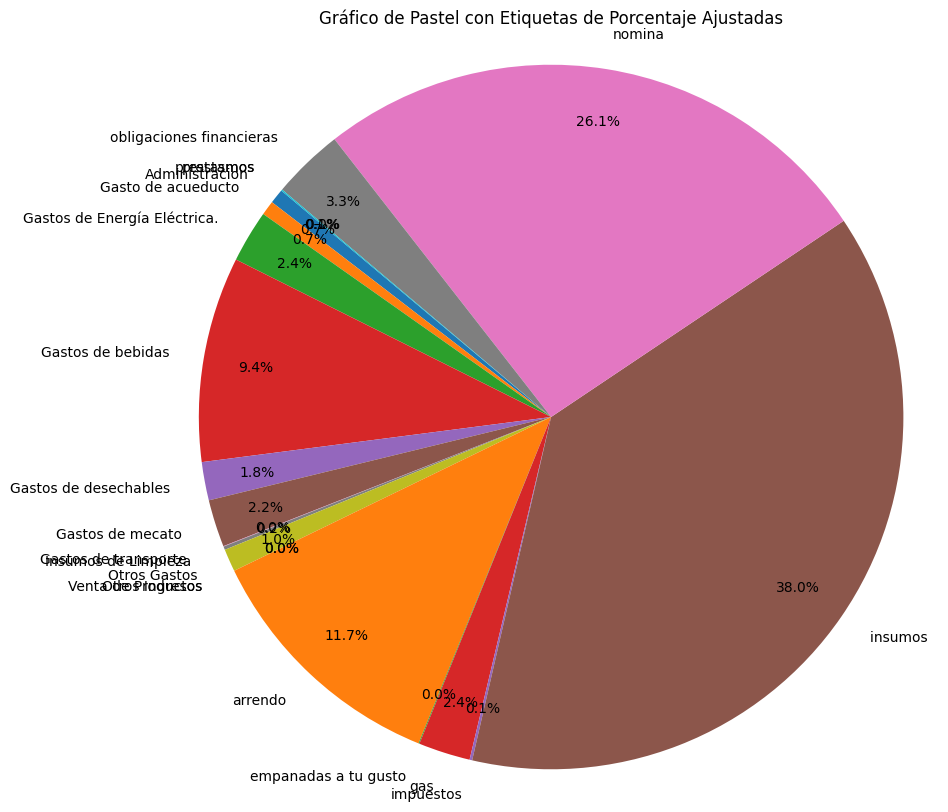

In [44]:
# Filtra el DataFrame para el año 2022
data_2022 = df[df['Fecha'].dt.year == 2022]

# Agrupa los datos por tipo y suma las entradas y salidas
data_grouped = data_2022.groupby('Tipo')[['Salida']].sum()

# Ajusta la distancia de las etiquetas de porcentaje del centro del gráfico
pctdistance = 0.85  s

# Crea un gráfico de pastel
plt.figure(figsize=(10, 10))
plt.pie(data_grouped['Salida'], labels=data_grouped.index, autopct='%1.1f%%', pctdistance=pctdistance, startangle=140) 
plt.title('Gráfico de Pastel con Etiquetas de Porcentaje Ajustadas')
plt.axis('equal')
plt.show()
